#Uso de software para búsqueda
Pedro Antonio Mendoza Rivera 2008344 N1

Empezamos por declarar las librerias a utilizar

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


Se importan los datos del MNIST

In [ ]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Se le asignan los nombres a cada uno de los conjuntos de datos del 0 al 9

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

Se explora el set de datos con el que se entrenara el modelo

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(y_test)

10000

Preprocesamiento de datos

<function matplotlib.pyplot.show(close=None, block=None)>

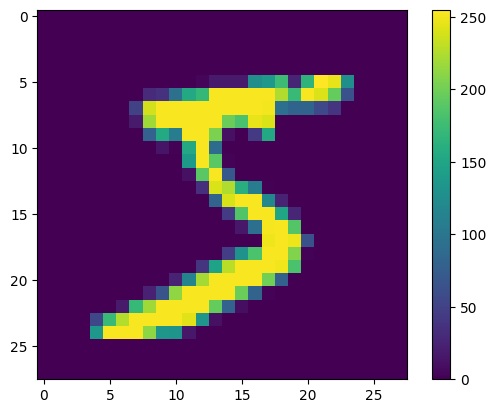

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

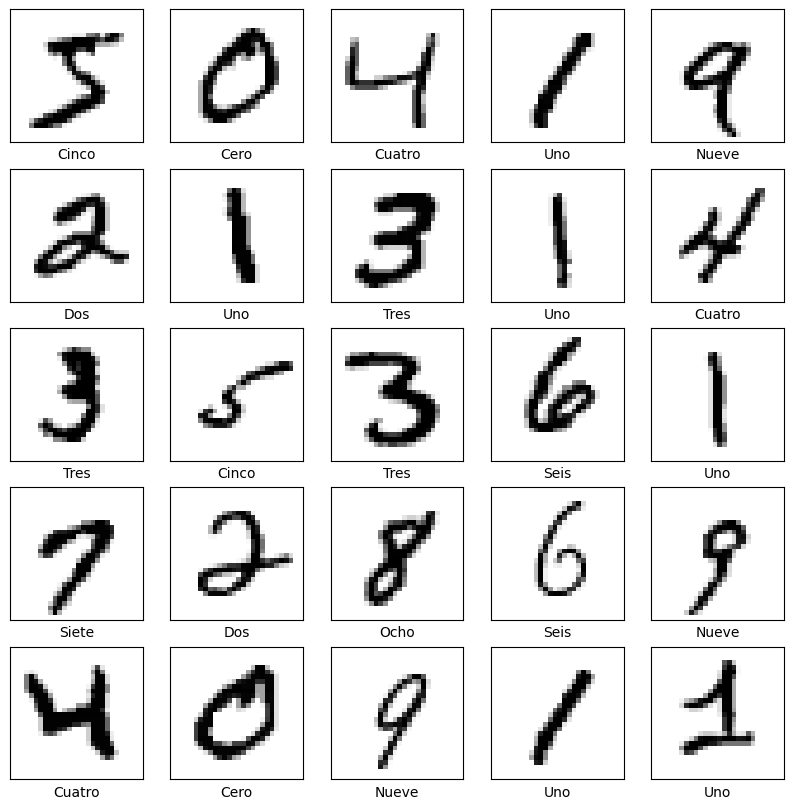

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

Se construye el modelo de red neuronal, donde se configuran las capas del modelo

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Se compila el modelo entrenado

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1110 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0773 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0582 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0355 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.016

Se evalua la exactitud del modelo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0771 - accuracy: 0.9808 - 1s/epoch - 3ms/step

Test accuracy: 0.9807999730110168


Se empiezan a realizar las predicciones

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Predicción 1

In [ ]:
predictions[0]

array([2.1146360e-09, 1.9107359e-12, 2.8087527e-08, 5.3722630e-05,
       2.9220121e-15, 7.5356099e-10, 7.7254715e-18, 9.9994582e-01,
       8.4582339e-08, 3.2951823e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
y_test[0]

7

Predicción 2

In [ ]:
predictions[5]

array([5.2835585e-08, 9.9905032e-01, 1.4145687e-07, 3.1104888e-09,
       2.1379044e-08, 3.3667683e-10, 2.2093835e-10, 9.4768353e-04,
       1.7304877e-06, 2.5183008e-10], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
y_test[5]

1

Predicción 3

In [ ]:
predictions[9]

array([8.3794577e-12, 9.4416140e-14, 2.5165553e-12, 1.8414202e-06,
       1.9561434e-05, 4.5362191e-12, 6.8433544e-16, 7.2633462e-05,
       2.8251998e-05, 9.9987769e-01], dtype=float32)

In [ ]:
np.argmax(predictions[9])

9

In [ ]:
y_test[9]

9

Predicción 4

In [ ]:
predictions[24]

array([3.0877922e-09, 5.2772249e-09, 9.8761404e-07, 2.1354354e-09,
       9.9983644e-01, 4.4962303e-07, 3.1233680e-09, 3.5783447e-05,
       1.3492281e-07, 1.2624022e-04], dtype=float32)

In [ ]:
np.argmax(predictions[24])

4

In [ ]:
y_test[24]

4

Predicción 5

In [ ]:
predictions[3458]

array([9.9999875e-01, 1.3248061e-11, 3.7599335e-10, 1.8874678e-10,
       9.5831858e-12, 1.1208593e-09, 3.6850361e-07, 7.2932953e-09,
       3.1650094e-14, 7.8825724e-07], dtype=float32)

In [ ]:
np.argmax(predictions[3458])

0

In [ ]:
y_test[3458]

0

Se grafica para poder ver todo el set de la prediccion de las 10 clases.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Grafica de la predicción 1

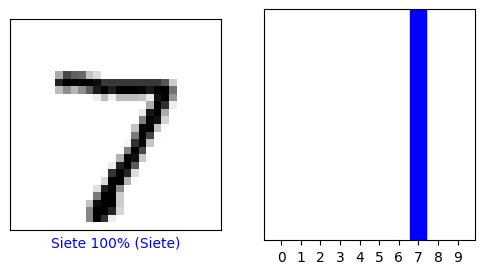

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Grafica predicción 2

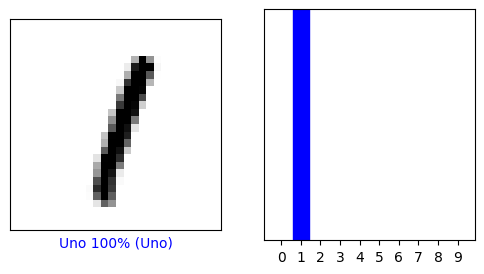

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Grafica predicción 3

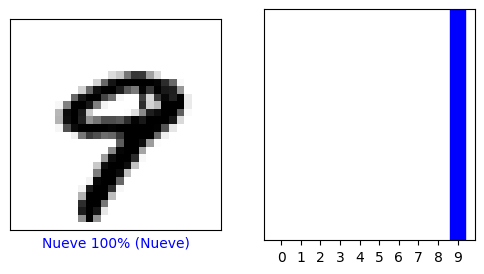

In [ ]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Grafica prediccion 4

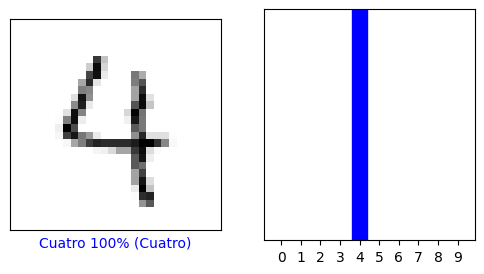

In [ ]:
i = 24
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Grafica predicción 5

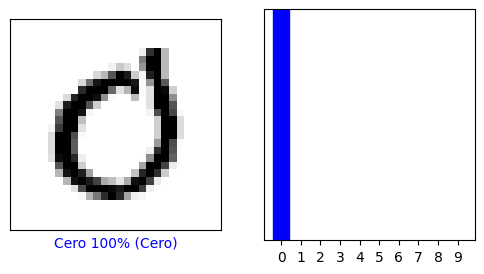

In [ ]:
i = 3458
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones

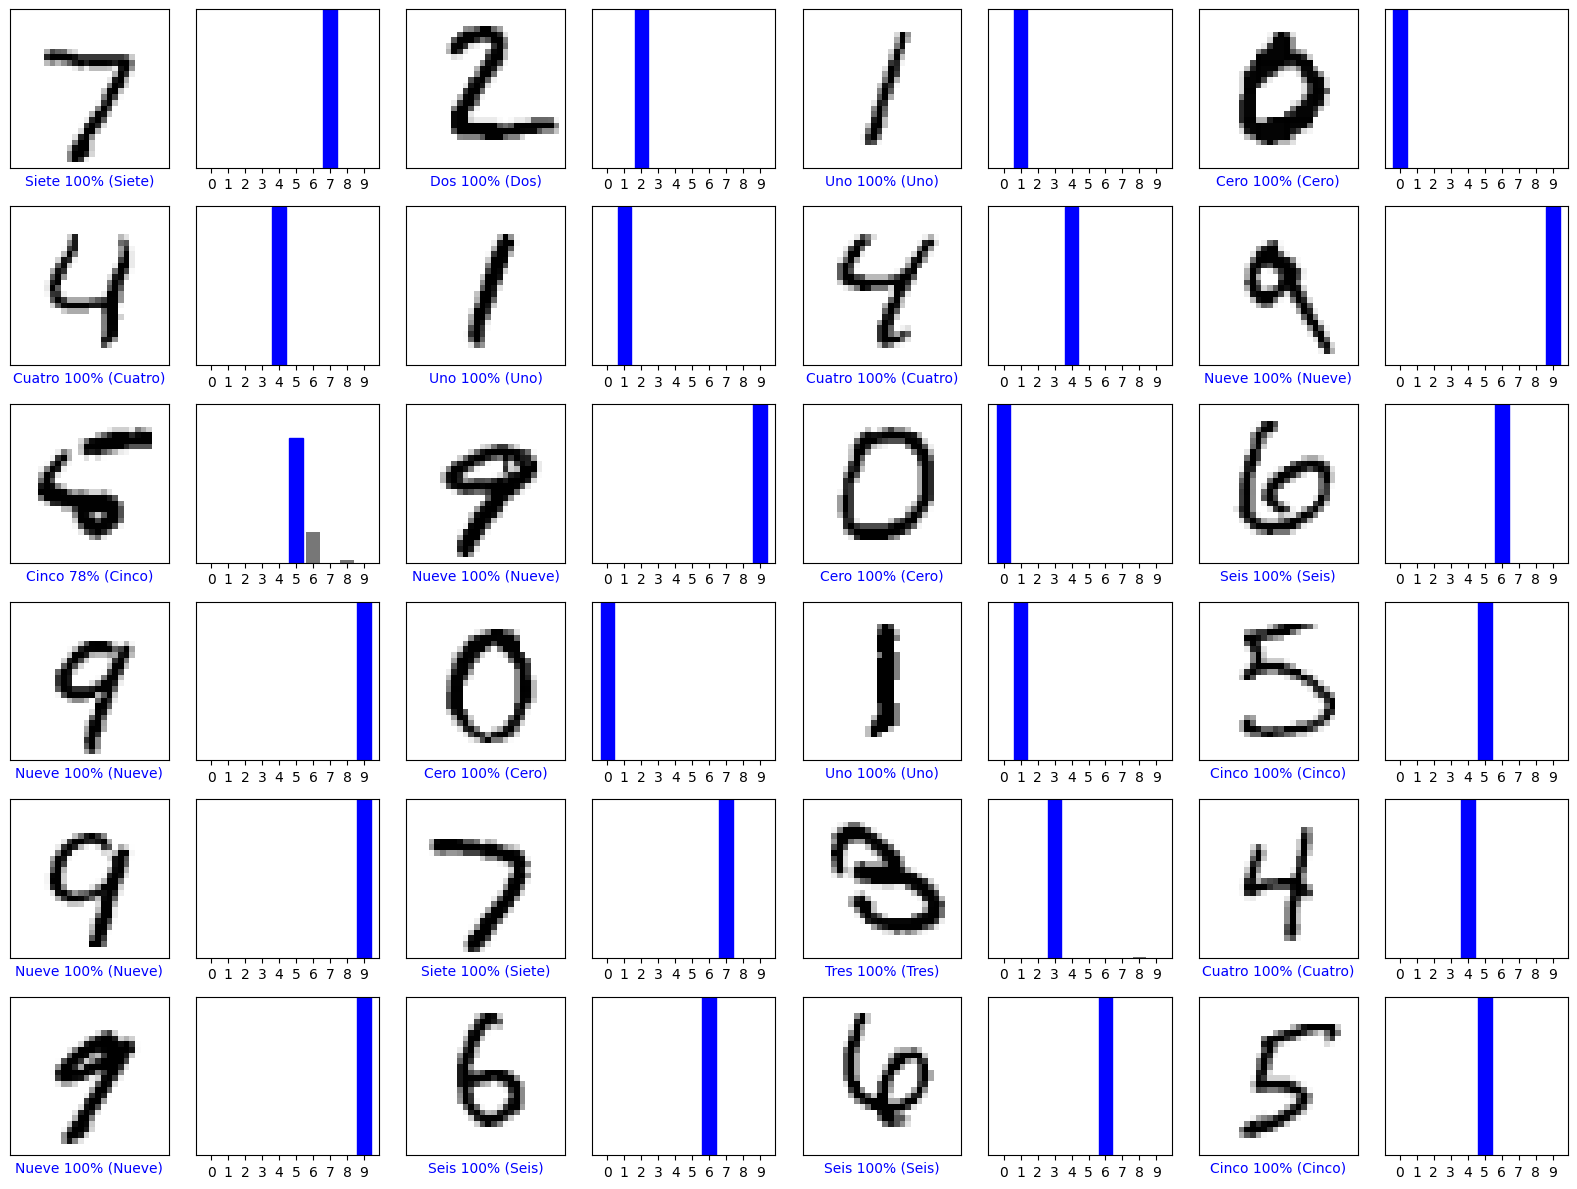

In [ ]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [ ]:
img = x_test[1]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[2.78037521e-13 1.21725199e-08 1.00000000e+00 1.17381813e-10
  1.35654099e-25 1.14536798e-13 2.77818052e-13 1.19300104e-22
  1.26000954e-11 1.23089375e-23]]


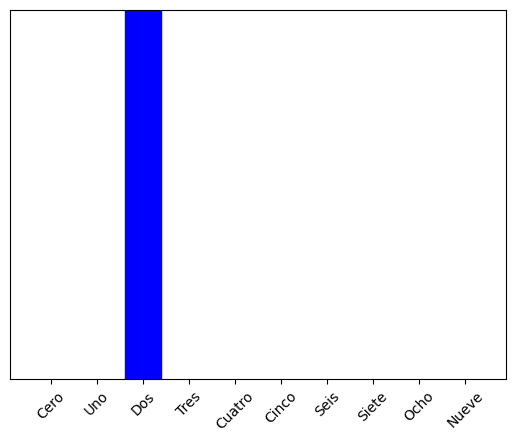

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2